# Produce figure 3

### Zoïs Moitier (2021)
            
_Karlsruhe Institute of Technology, Germany_

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

import Analytic
import BIE

In [2]:
N = 64  # Number of quadrature points
nb_ε = 16  # Number of ε
ε_min, ε_max = 1e-8, 0.9  # Limits for ε

## Internal plotting function

In [3]:
def calc_err(result, sol):
    sol_num = sol(result[2])
    return np.abs(result[0] - sol_num).max() / np.abs(sol_num).max()

In [4]:
def plot_err(even_odd, m, slope):
    ε_vec = np.geomspace(ε_min, ε_max, num=nb_ε)

    err_ptr = np.zeros(nb_ε)
    err_mtr = np.zeros(nb_ε)
    err_qpax = np.zeros(nb_ε)

    for i, ε in enumerate(ε_vec):
        E = BIE.ellipse(ε)

        if even_odd.startswith("eve"):
            trace, sol = Analytic.laplace_sol_eve(m, ε)
            trace_ev_od = (trace, None)

        if even_odd.startswith("odd"):
            trace, sol = Analytic.laplace_sol_odd(m, ε)
            trace_ev_od = (None, trace)

        err_ptr[i] = calc_err(BIE.laplace_ptr(E, trace, N), sol)
        err_mtr[i] = calc_err(BIE.laplace_mtr(E, trace, N, ε), sol)
        err_qpax[i] = calc_err(BIE.laplace_qpax(ε, trace_ev_od, N), sol)

    fig_size = [1.25 * e for e in [6.4, 4.8]]
    fig, ax = plt.subplots(figsize=fig_size, constrained_layout=True)

    ax.loglog(ε_vec, err_ptr, "o", ls="solid", label="PTR")
    ax.loglog(ε_vec, err_mtr, "P", ls="dashdot", label="MTR")
    ax.loglog(ε_vec, err_qpax, "X", ls="dashed", label="QPAX")

    if slope[0]:
        ε_ = np.array([1e-8, 1e-3])
        ax.loglog(ε_, 10 ** (-0.5) * ε_, "k", label=r"$\mathcal{O}(\varepsilon)$")

    if slope[1]:
        ε_ = np.array([1e-5, 1e-3])
        ax.loglog(ε_, ε_ ** 3, "k--", label=r"$\mathcal{O}(\varepsilon^3)$")

    ax.set_xlim(1e-8 / 10 ** 0.5, 1 * 10 ** 0.5)
    ax.set_xlabel(r"$\varepsilon$", fontsize=15)
    ax.set_ylim(1e-16 / 10, 10)
    ax.set_ylabel("error relative", fontsize=15)
    ax.grid(True)

    ax.legend(loc=4, fontsize=15)
    ax.set_title(f"Number of quadrature points 2N = {N}", fontsize=15)

    return None

## Relative error for even solution

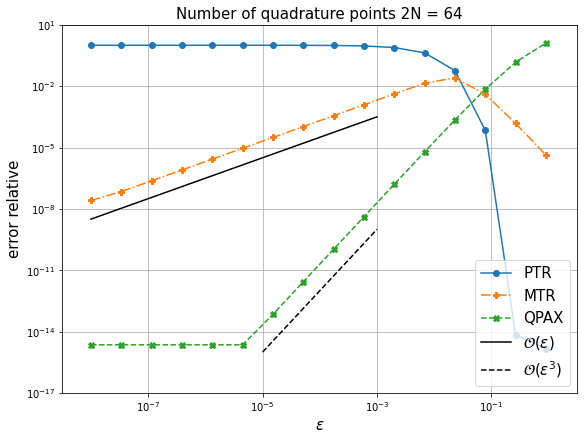

In [5]:
plot_err("even", 4, (True, True))

## Relative error for odd solution

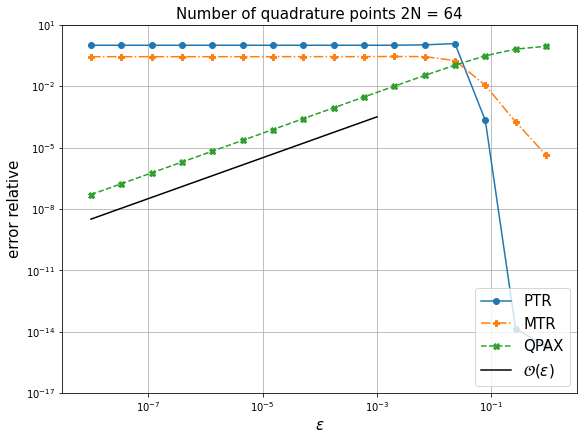

In [6]:
plot_err("odd", 5, (True, False))